<a href="https://colab.research.google.com/github/fzambran/EstadisticasCienciaDeDatos/blob/main/Tareas/est_ds_python_2_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización de datos con Python

**Estadísticas para la Ciencia de Datos con Python**</br>
**Escuela de Informática y Telecomunicaciones**</br>
**Duoc UC**

---


<a id="ejercicios-de-practica"></a>
### Ejercicios de práctica

Considere la base de datos `gapminder.xlsx` utilizada en la actividad de la *Clase 1*. Todos los gráficos solicitados deben tener un título y los ejes debidamente etiquetados.

**1.** Realice un gráfico de barras que permita comparar la cantidad de países entre continentes.

In [ ]:
# Responda aquí:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

data = pd.read_excel('data/gapminder.xlsx')
data.head()

,country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
0,Albania,1960,115.40,62.87,6.19,1636054.0,NaN,Europe,Southern Europe
1,Algeria,1960,148.20,47.50,7.65,11124892.0,1.382815e+10,Africa,Northern Africa
2,Angola,1960,208.00,35.98,7.32,5270844.0,NaN,Africa,Middle Africa
3,Antigua and Barbuda,1960,NaN,62.97,4.43,54681.0,NaN,Americas,Caribbean
4,Argentina,1960,59.87,65.39,3.11,20619075.0,1.083223e+11,Americas,South America


Text(0.5, 0, 'Continente')

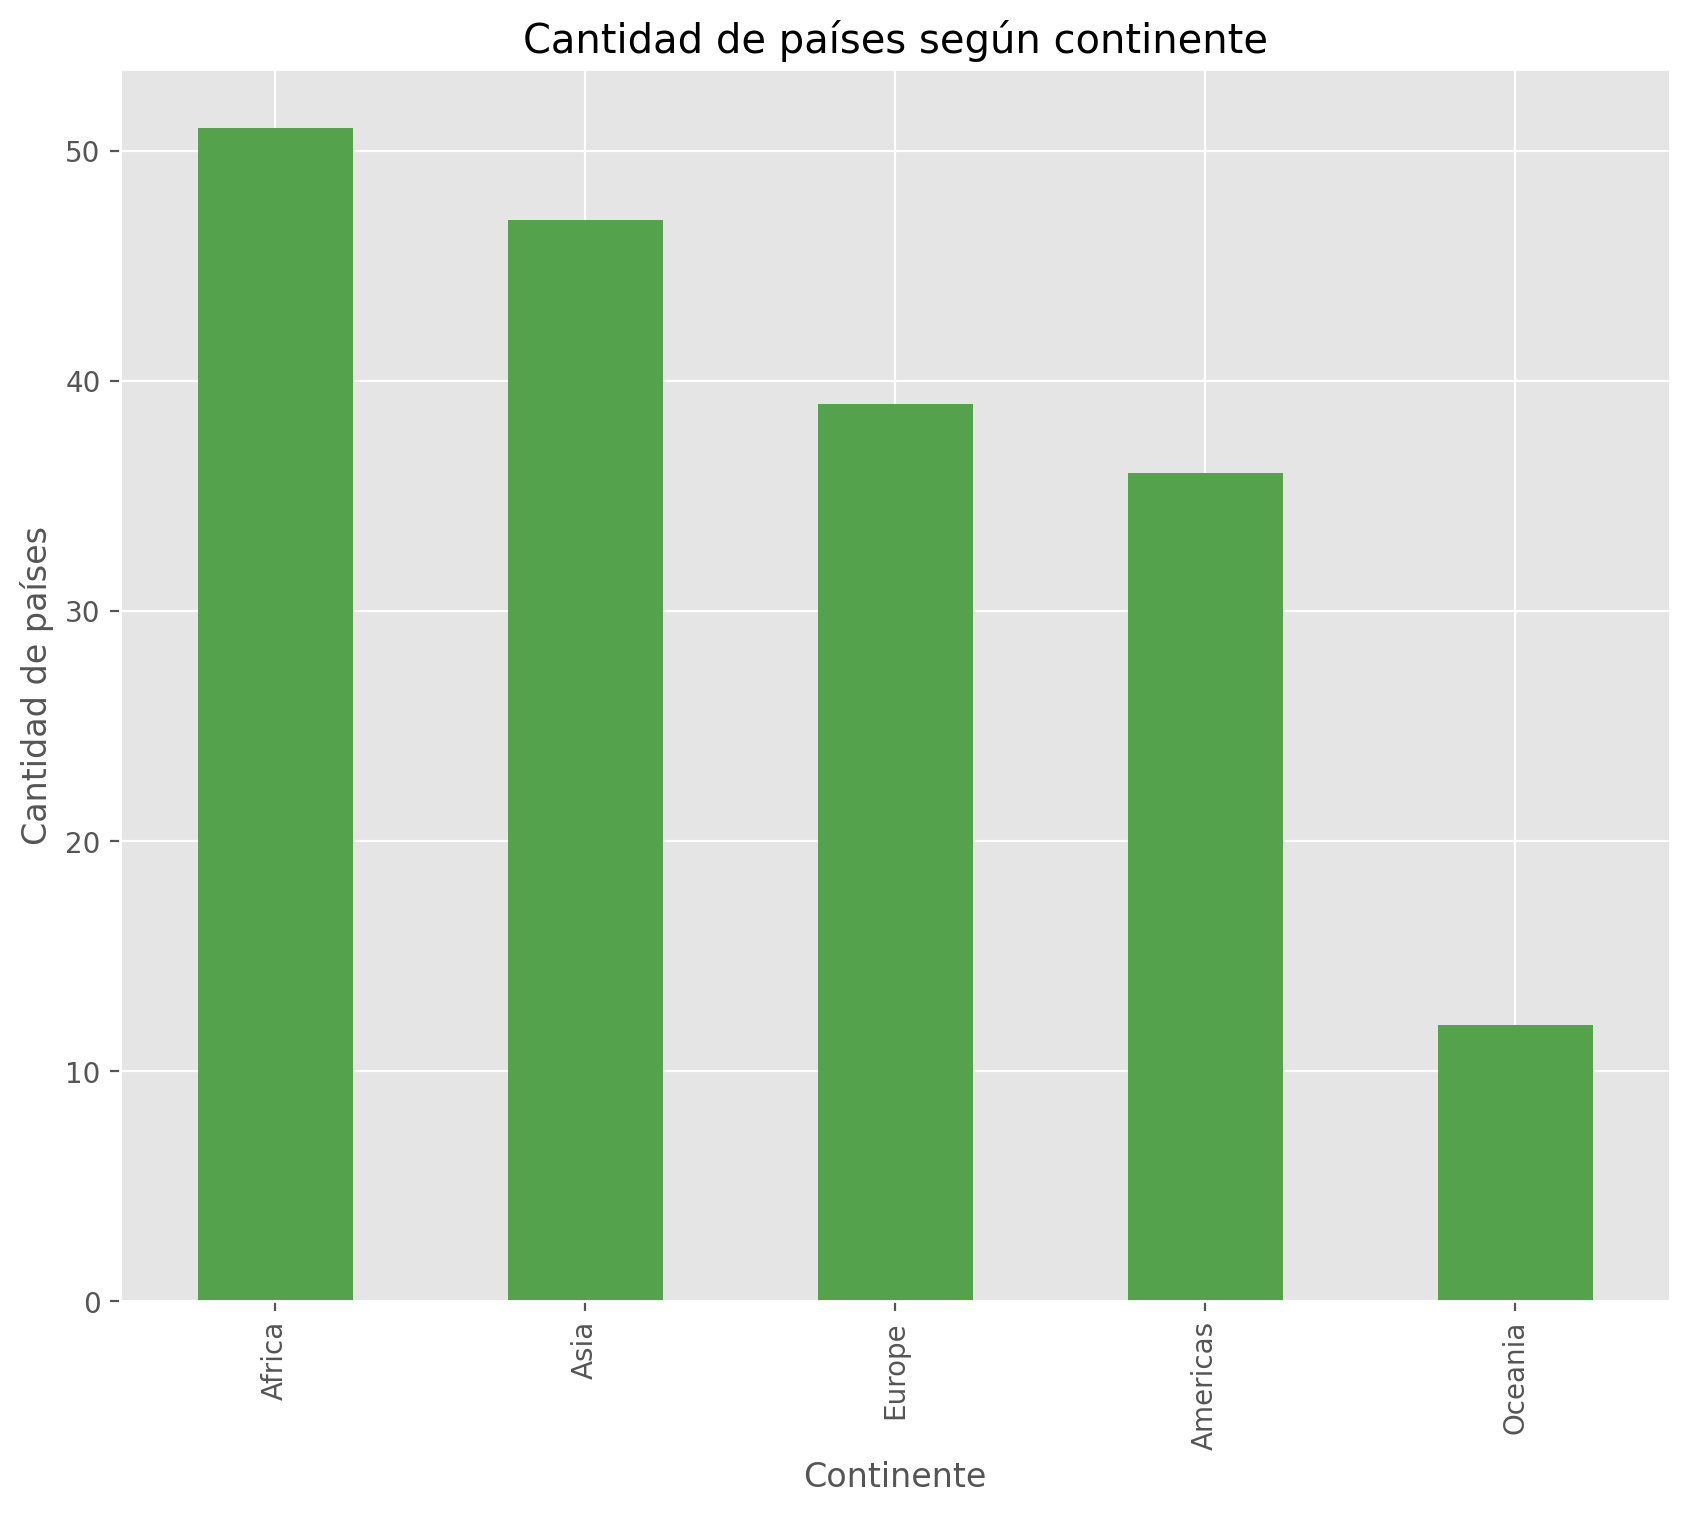

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
data.query("year ==  2011")["continent"].value_counts().plot(kind="bar", color="#54A24B", ax=ax)
plt.title("Cantidad de países según continente")
plt.ylabel("Cantidad de países")
plt.xlabel("Continente")

**2.** Realice un gráfico de líneas para estudiar la evolución de la esperanza de vida en Chile.

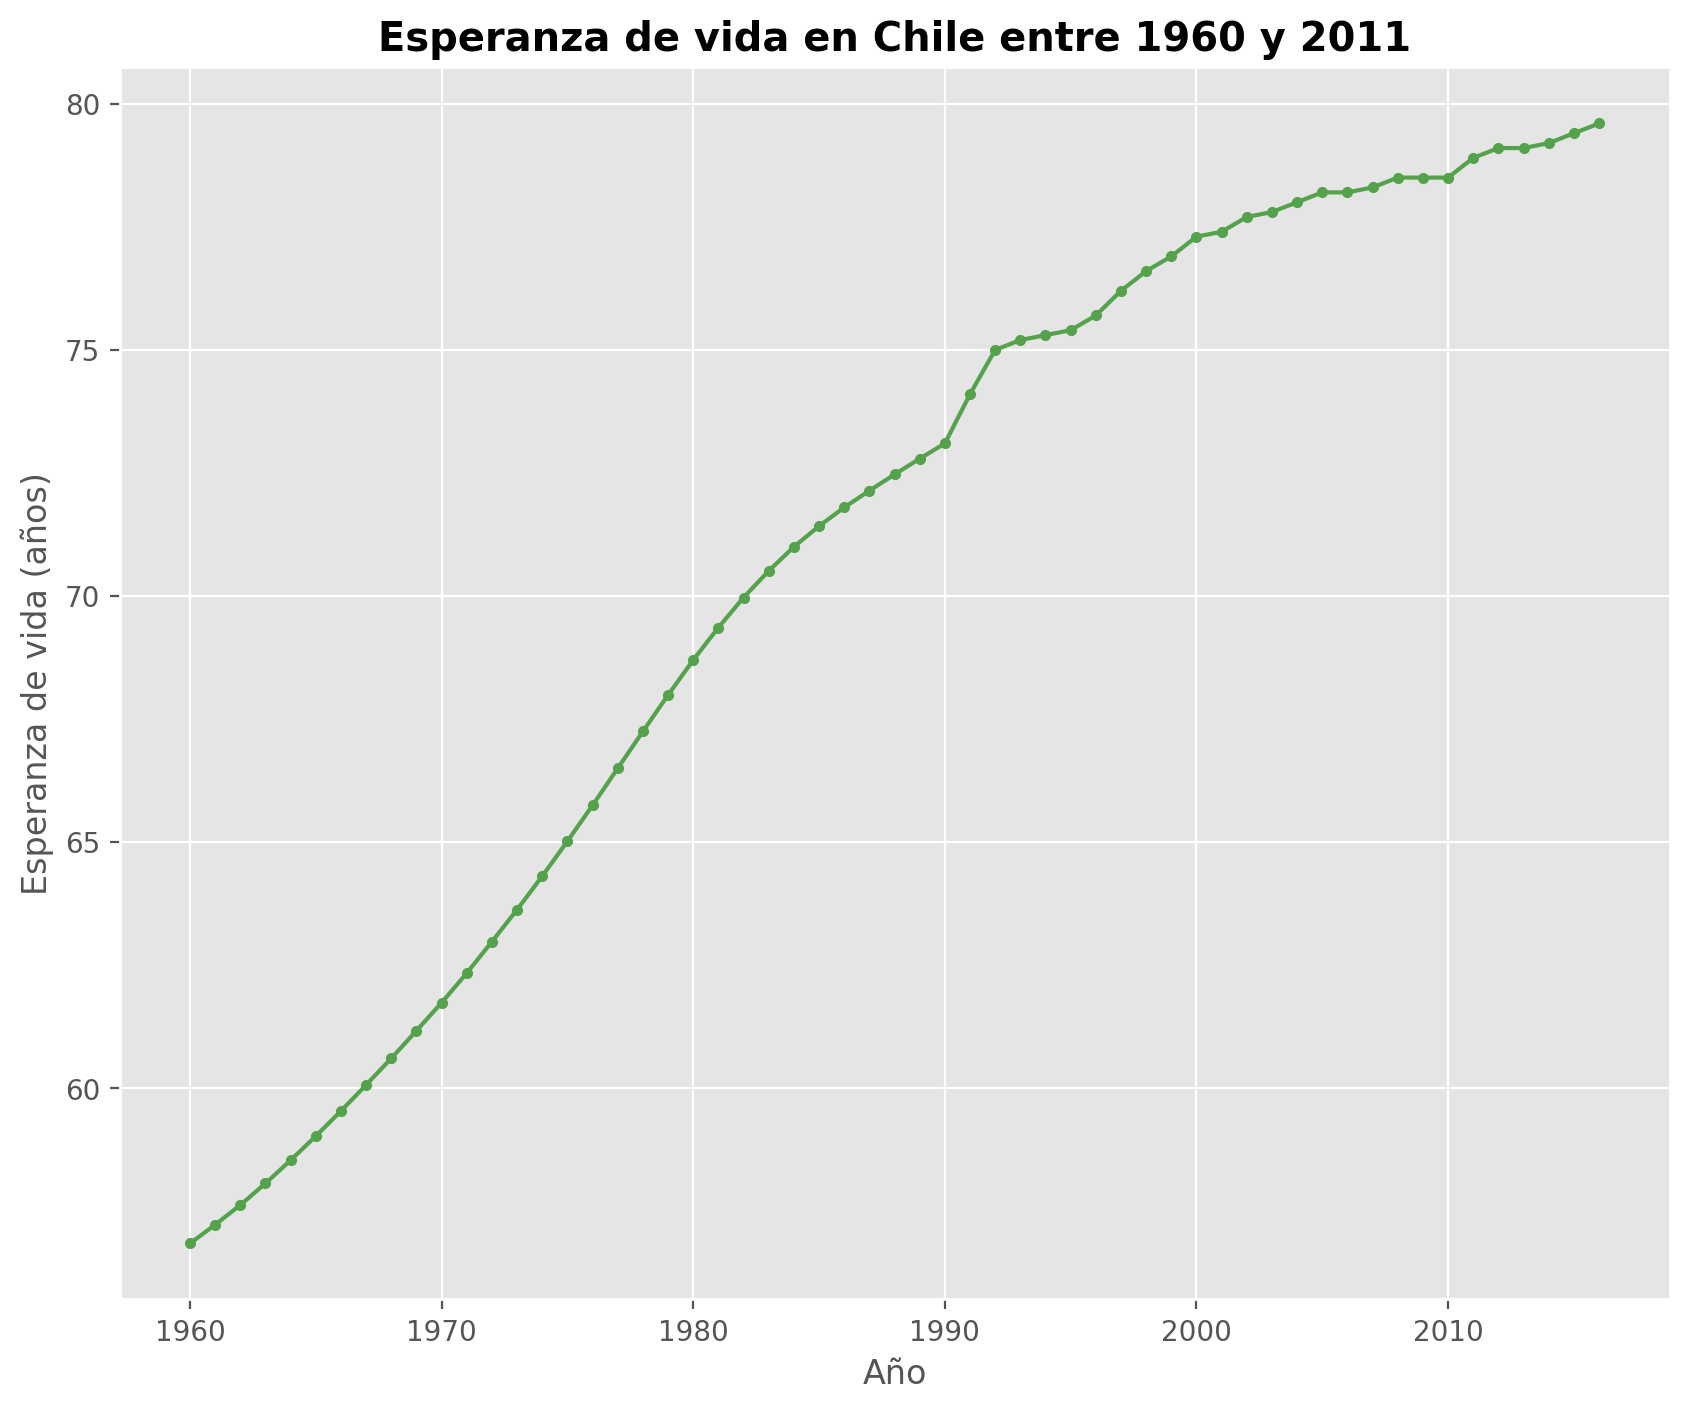

In [ ]:
# Responda aquí:
fig, ax = plt.subplots(figsize=(10, 8))
data.query("country == 'Chile'").plot("year", "life_expectancy", kind="line", color="#54A24B", ax=ax, marker=".")
plt.xlabel("Año")
plt.ylabel("Esperanza de vida (años)")
plt.title("Esperanza de vida en Chile entre 1960 y 2011", fontweight="bold")
ax.get_legend().remove()

**3.** Realice un gráfico de barras que muestre la esperanza de vida promedio por continente en 2011.


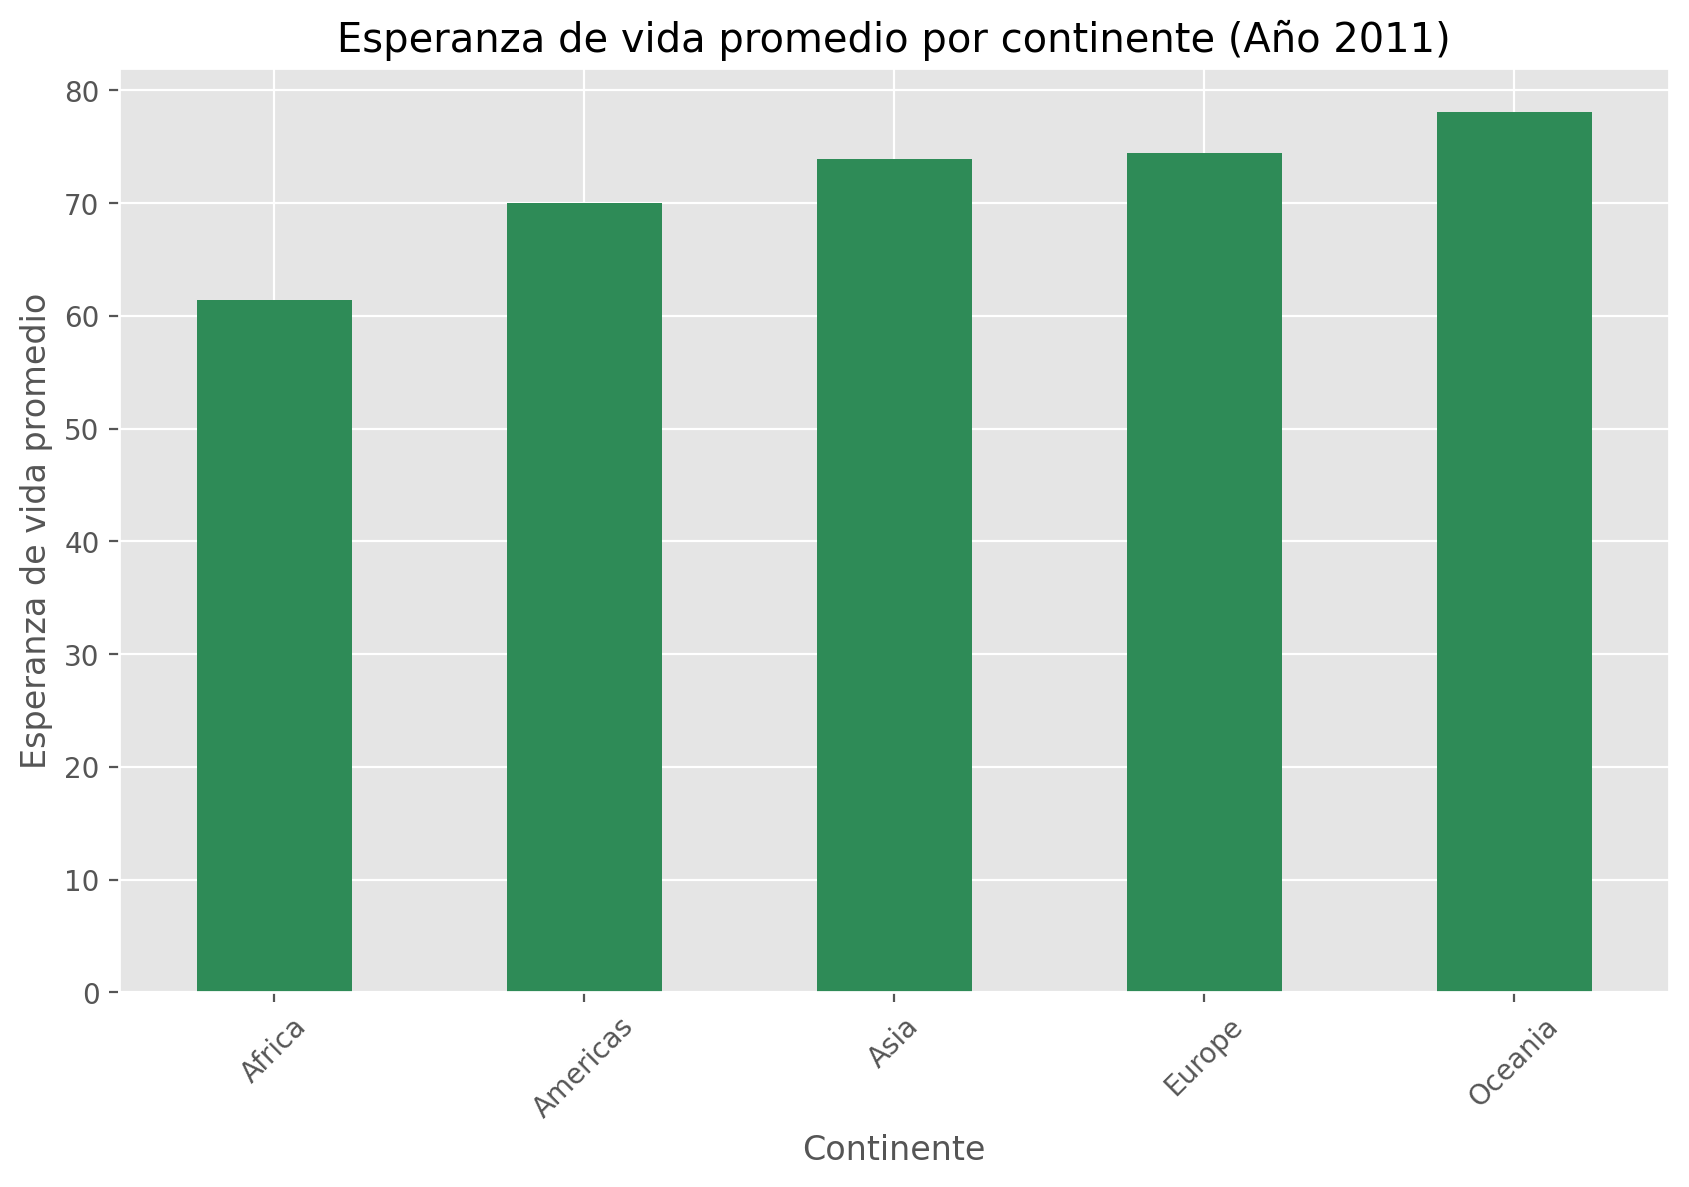

In [ ]:
# Responda aquí:
life_expectancy_2011 = data[data["year"] == 2011].groupby("continent")["life_expectancy"].mean()

fig, ax = plt.subplots(figsize=(10, 6))
life_expectancy_2011.sort_values().plot(kind="bar", ax=ax, color="seagreen")

ax.set_xlabel("Continente")
ax.set_ylabel("Esperanza de vida promedio")
ax.set_title("Esperanza de vida promedio por continente (Año 2011)")
ax.set_xticklabels(life_expectancy_2011.index, rotation=45);

**4.** En un panel de gráficos, muestre un gráfico de barras la esperanza de vida promedio por continente en 2000 y 2011.

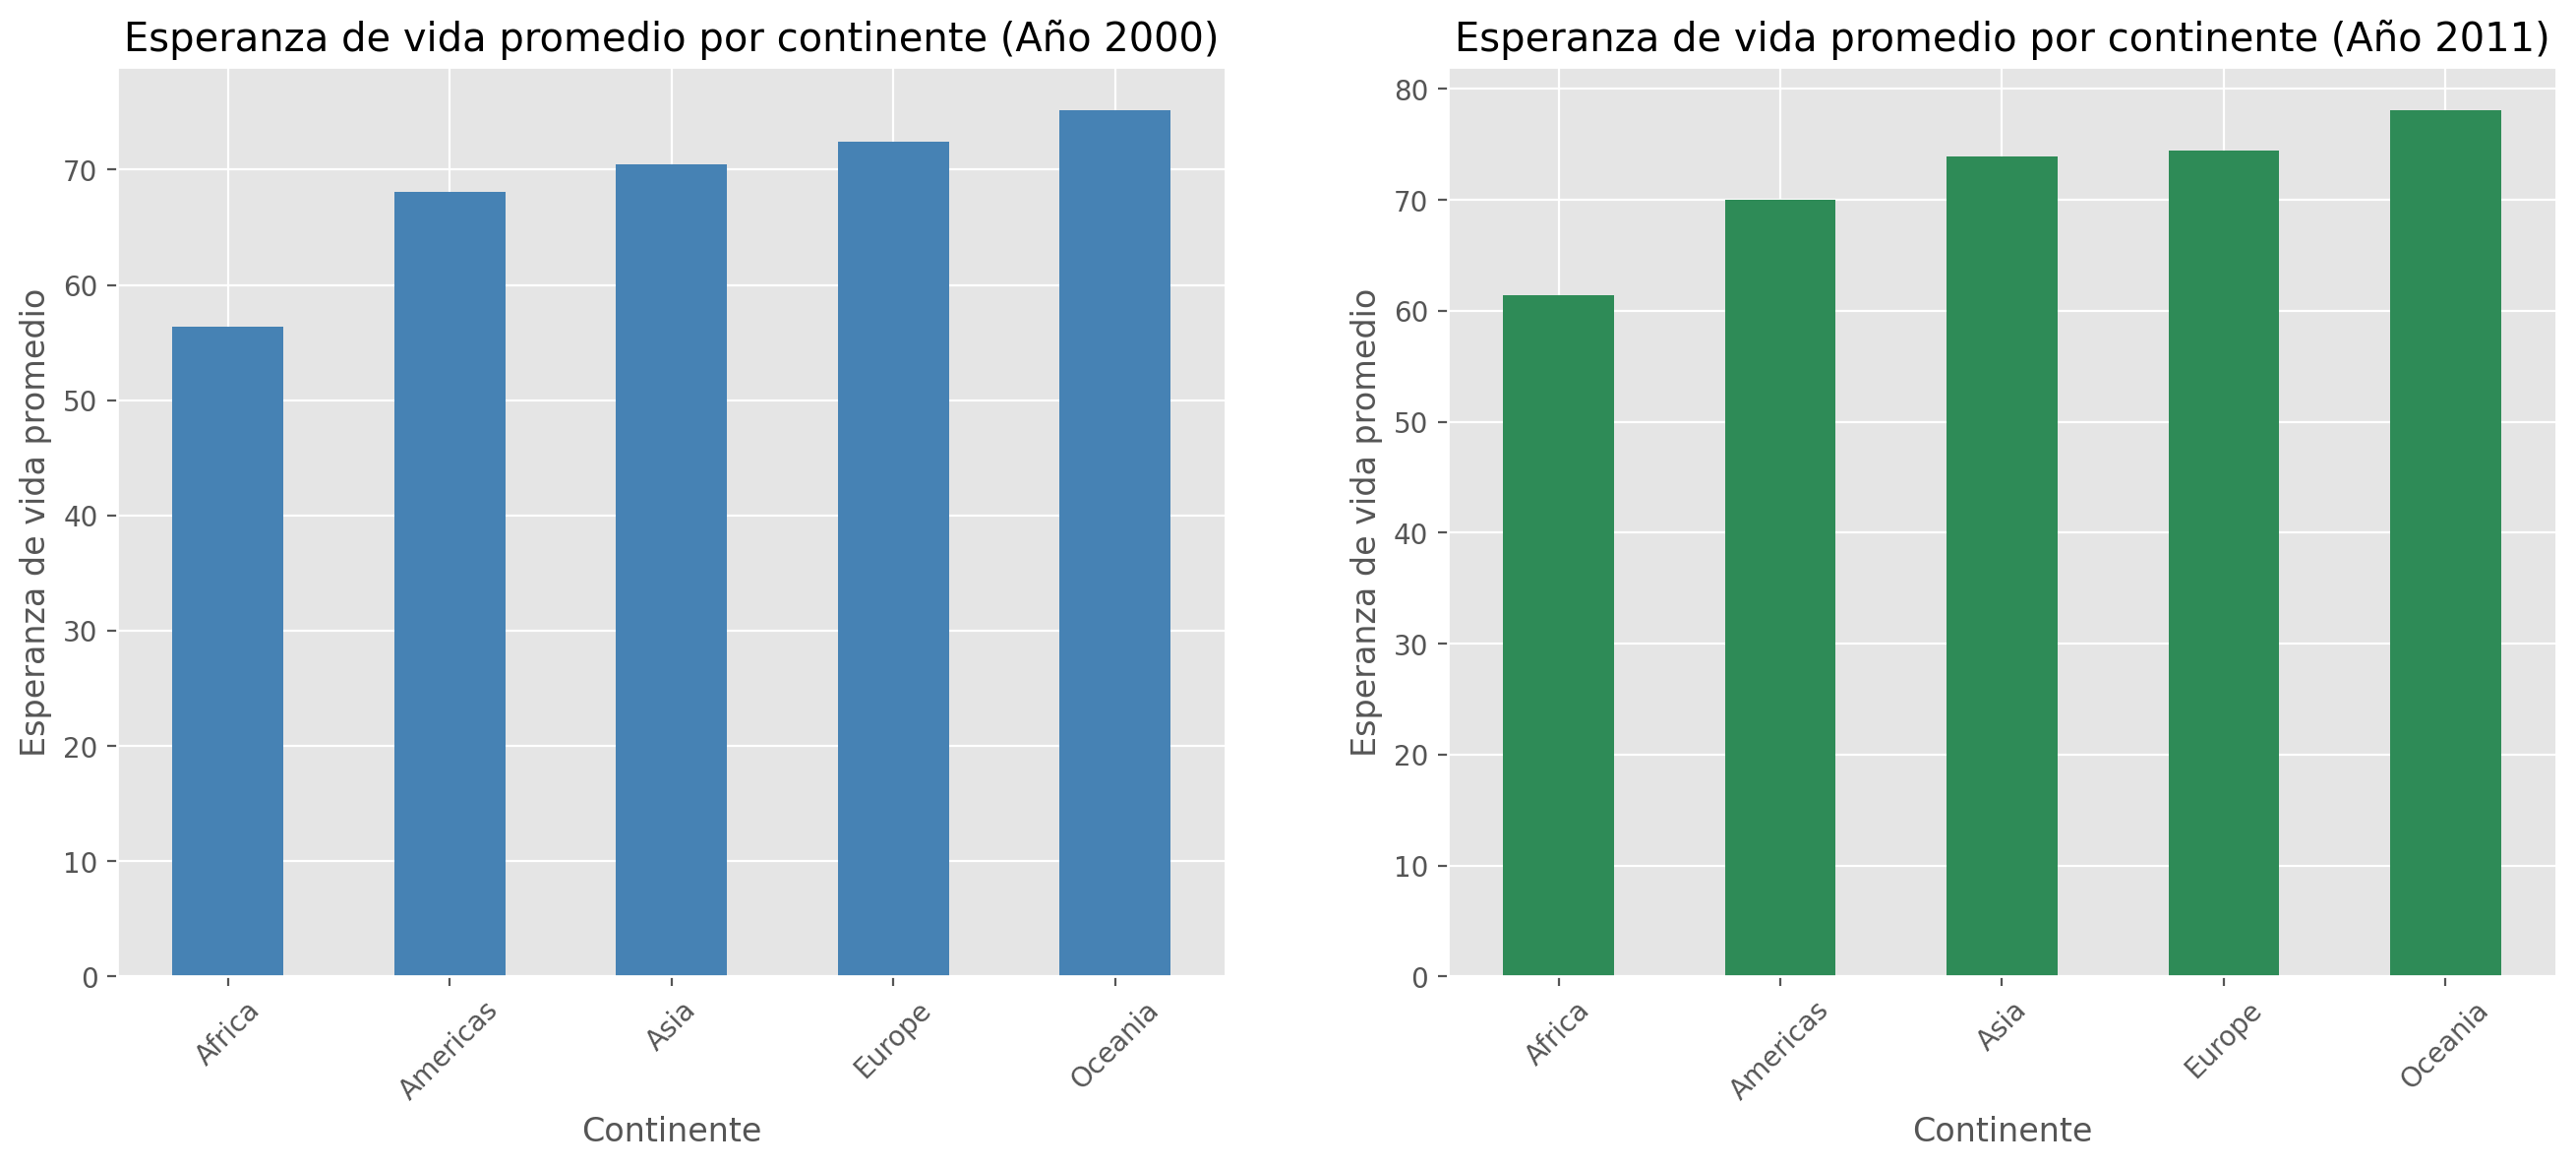

In [ ]:
# Responda aquí:
life_expectancy_2000 = data[data["year"] == 2000].groupby("continent")["life_expectancy"].mean()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Gráfico para el año 2000
life_expectancy_2000.sort_values().plot(kind="bar", ax=ax[0], color="steelblue")
ax[0].set_xlabel("Continente")
ax[0].set_ylabel("Esperanza de vida promedio")
ax[0].set_title("Esperanza de vida promedio por continente (Año 2000)")
ax[0].set_xticklabels(life_expectancy_2000.index, rotation=45)

# Gráfico para el año 2011
life_expectancy_2011.sort_values().plot(kind="bar", ax=ax[1], color="seagreen")
ax[1].set_xlabel("Continente")
ax[1].set_ylabel("Esperanza de vida promedio")
ax[1].set_title("Esperanza de vida promedio por continente (Año 2011)")
ax[1].set_xticklabels(life_expectancy_2011.index, rotation=45);

**5.** Muestre como evoluciona la esperanza de vida promedio por continente en el tiempo, en un gráfico de líneas múltiples.

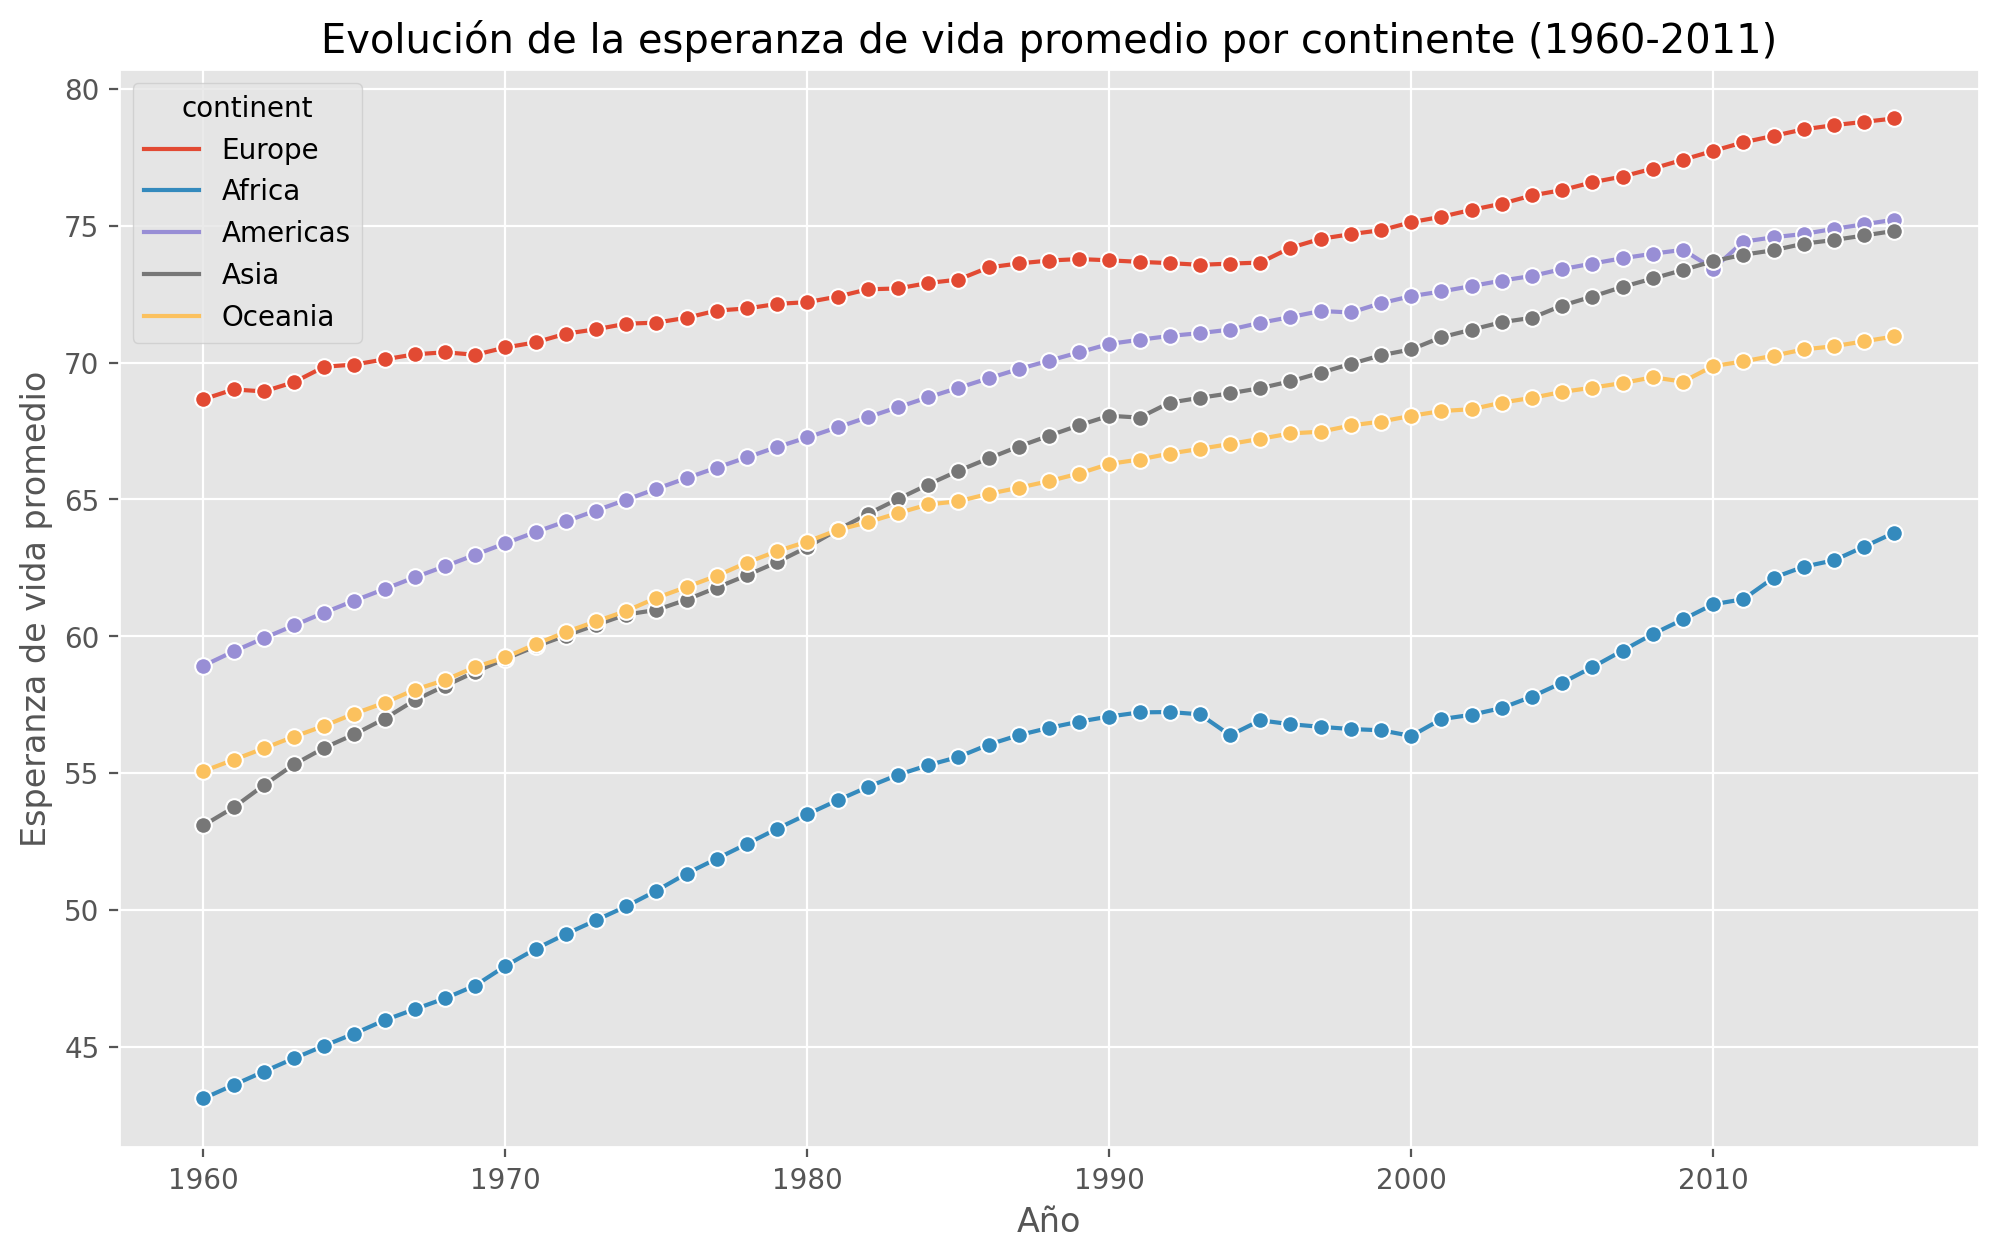

In [ ]:
# Responda aquí:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12, 7))

sns.lineplot(
    x        = "year",
    y        = "life_expectancy",
    hue      = "continent",
    data     = data,
    marker   = "o",
    ax       = ax,
    errorbar = None
)

ax.set_xlabel("Año")
ax.set_ylabel("Esperanza de vida promedio")
ax.set_title("Evolución de la esperanza de vida promedio por continente (1960-2011)");